In [8]:
!nvcc orth_loss.cu -o orth_loss -lcublas

In [9]:
!./orth_loss

Size 1024x256: 0.083840 ms
Size 2048x512: 0.143680 ms
Size 4096x1024: 0.542976 ms
Size 8192x2048: 3.489536 ms
Size 16384x4096: 25.502720 ms
Size 32768x8192: 194.073563 ms


In [10]:
!python orth_loss.py

Size 1024x256: 0.73 ms
Size 2048x512: 0.41 ms
Size 4096x1024: 1.13 ms
Size 8192x2048: 4.88 ms
Size 16384x4096: 30.13 ms
Size 32768x8192: 204.81 ms


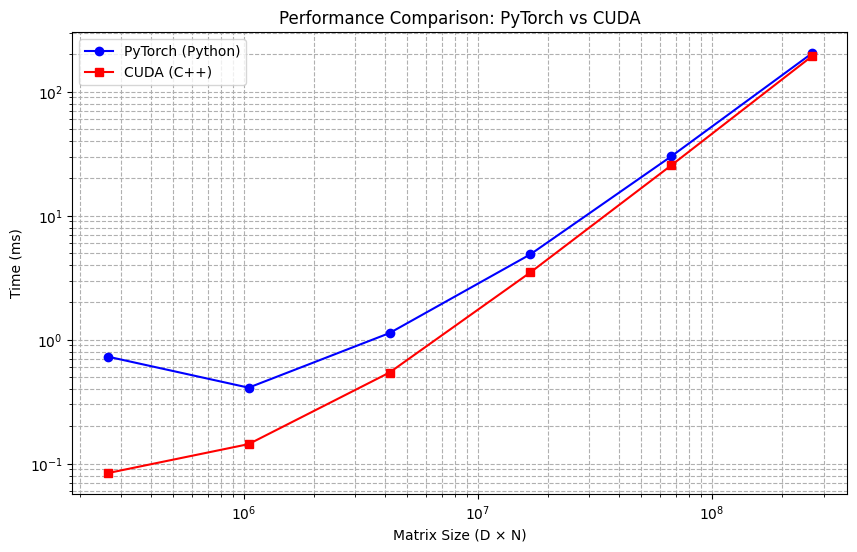

In [11]:
import matplotlib.pyplot as plt
import re

def parse_times(filename):
    sizes = []
    times = []
    with open(filename, 'r') as f:
        for line in f:
            match = re.match(r"Size (\d+)x(\d+): ([\d.]+) ms", line.strip())
            if match:
                D, N, time = map(float, match.groups())
                sizes.append(D * N)
                times.append(time)
    return sizes, times

pytorch_sizes, pytorch_times = parse_times("pytorch_times.txt")
cuda_sizes, cuda_times = parse_times("cuda_times.txt")

plt.figure(figsize=(10, 6))
plt.plot(pytorch_sizes, pytorch_times, marker='o', label='PyTorch (Python)', color='blue')
plt.plot(cuda_sizes, cuda_times, marker='s', label='CUDA (C++)', color='red')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (D × N)')
plt.ylabel('Time (ms)')
plt.title('Performance Comparison: PyTorch vs CUDA')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.savefig('speed_comparison.png')